In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
vet = np.asarray([224, 208, 213, 196, 255, 210, 210, 232, 235, 212, 191, 210, 220, 197, 184, 214, 232, 213, 215, 251, 198, 203, 201, 233, 234, 225, 165, 209, 218, 200, 211, 213, 187, 230, 228, 205, 181, 207, 222, 198, 203, 163, 196, 224, 187, 232, 173, 229, 197, 204, 198, 210, 196, 224, 194, 190, 219, 195, 193, 192, 191, 191, 190, 246, 182, 215, 193, 186, 200, 213, 155, 235, 186, 177, 181, 166, 175, 164, 244, 189, 185, 223, 158, 199, 186, 175, 195, 158, 194, 205, 224, 178, 173, 195, 159, 177, 195, 177, 194, 167, 162, 154, 157, 187, 212, 203, 152, 198, 163, 194, 204, 201, 161, 193, 181, 198, 174, 169, 200, 170, 167, 150, 182, 202, 191, 179, 177, 174])

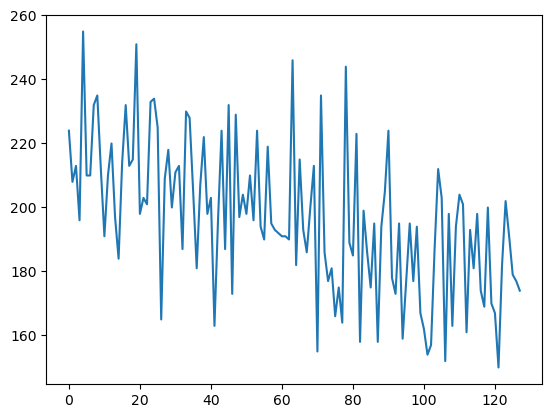

In [3]:
plt.plot(vet)

In [4]:
#Exemplo 1 Hz
t = np.arange(0, 1, 0.005)
pi = 3.1415
fsin1 = np.sin(t * (2*pi))

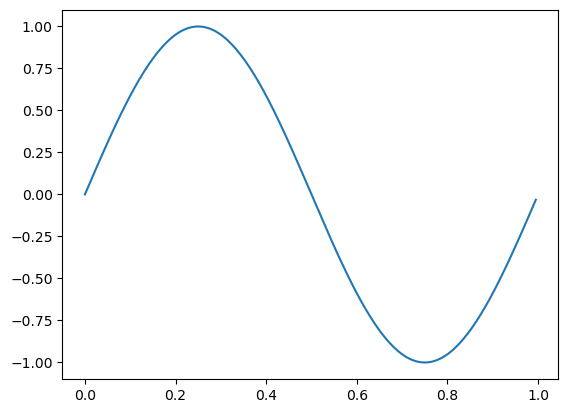

In [5]:
plt.plot(t,fsin1)

In [6]:
Fs = 3 # Parametro de Frequência
fsin3 = np.sin(t * (2*pi) * Fs)

Text(0.5, 1.0, 'seno em 3 Hz')

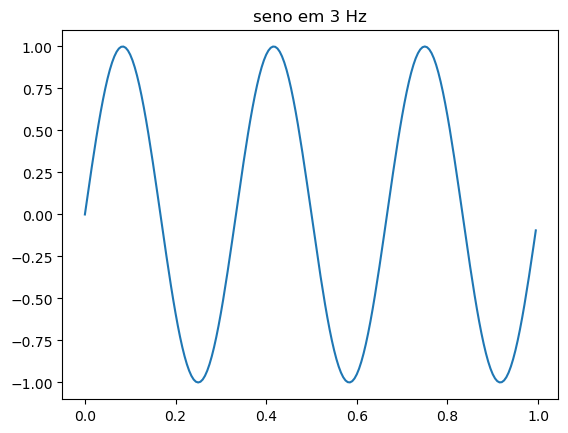

In [7]:
plt.plot(t, fsin3)
plt.title("seno em 3 Hz")

In [8]:
Fs = 10 # Parametro de Frequência
fsin10 = np.sin(t * (2*pi) * Fs)

Text(0.5, 1.0, 'seno em 10 Hz')

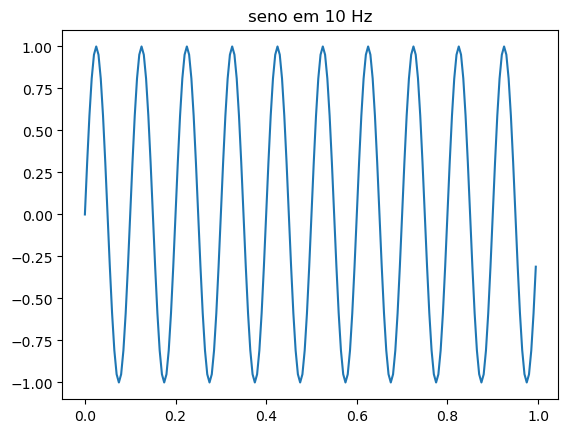

In [9]:
plt.plot(t, fsin10)
plt.title("seno em 10 Hz")

In [10]:
pi = 3.1415
t = np.arange(0, 1, 0.005)
sinal = 1 * np.sin(t * (2 * pi) * 2) + 0.6 * np.cos(t * (2*pi) * 8) + 0.4 * np.cos(t * (2 * pi) * 16) + 0.3 * np.sin(t * (2 * pi) * 32)

In [11]:
for Freq in range(1,5):
    SomaProdSeno = np.sum( sinal * np.sin(t * 2 * pi * Freq))
    SomaProdCoss = np.sum( sinal * np.cos(t * 2 * pi * Freq))
    print("Frequencia %d" % Freq)
    print("\tSeno = %.5f" % SomaProdSeno)
    print("\tCosseno = %.5f" % SomaProdCoss)

Frequencia 1
	Seno = 0.00008
	Cosseno = -0.00475
Frequencia 2
	Seno = 100.00311
	Cosseno = -0.00475
Frequencia 3
	Seno = 0.00024
	Cosseno = -0.00474
Frequencia 4
	Seno = 0.00033
	Cosseno = -0.00474


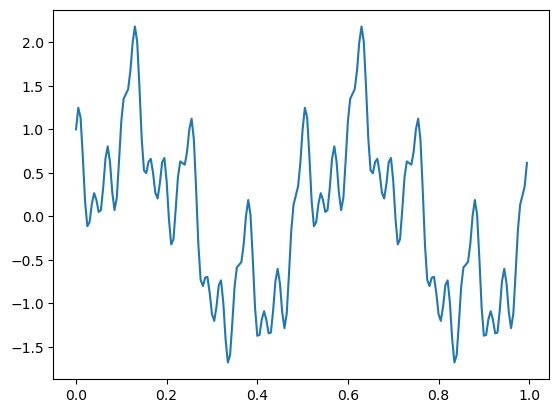

In [12]:
plt.plot(t, sinal)

In [13]:
print("Freq.\tSeno\tCosseno")

for Freq in range(1,33):
    SomaProdSeno = np.sum(sinal * np.sin(t * 2 * pi * Freq))
    SomaProdCoss = np.sum(sinal * np.cos(t * 2 * pi * Freq))
    print("%d\t%.3f\t%.3f" % (Freq, SomaProdSeno, SomaProdCoss))

Freq.	Seno	Cosseno
1	0.000	-0.005
2	100.003	-0.005
3	0.000	-0.005
4	0.000	-0.005
5	0.000	-0.005
6	0.000	-0.005
7	0.001	-0.005
8	0.001	59.997
9	0.001	-0.005
10	0.001	-0.005
11	0.001	-0.005
12	0.001	-0.005
13	0.001	-0.005
14	0.001	-0.005
15	0.001	-0.005
16	0.001	39.997
17	0.001	-0.005
18	0.001	-0.005
19	0.002	-0.005
20	0.002	-0.005
21	0.002	-0.005
22	0.002	-0.005
23	0.002	-0.004
24	0.002	-0.004
25	0.002	-0.004
26	0.002	-0.004
27	0.002	-0.004
28	0.002	-0.004
29	0.002	-0.004
30	0.002	-0.004
31	0.003	-0.004
32	30.003	-0.004


In [14]:
def maximum_frequencies(A):
    # vamos computar frequencias ate metade do tamanho do sinal
    n = int(A.shape[0] / 2)
    t = np.linspace(0, 1, n * 2)
    magnit = np.empty(n)
    
    for f in range(2, n):
        SomaProdSeno = np.sum(A * np.sin(t * 2 * pi * f))
        SomaProdCoss = np.sum(A * np.cos(t * 2 * pi * f))
        magnit[f] = SomaProdSeno + SomaProdCoss
        
    return np.argmax(magnit)

In [15]:
maximum_frequencies(sinal)

2

In [16]:
img1 = cv2.imread('img1.png', 0)
img2 = cv2.imread('gradient_noise.png', 0)

In [17]:
vet1 = img1[100, 64:192]
vet2 = img2[100, 64:192]

3


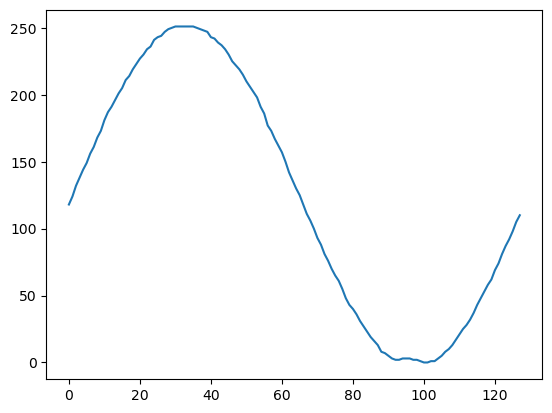

In [18]:
plt.plot(vet1)
print(maximum_frequencies(vet1))

27


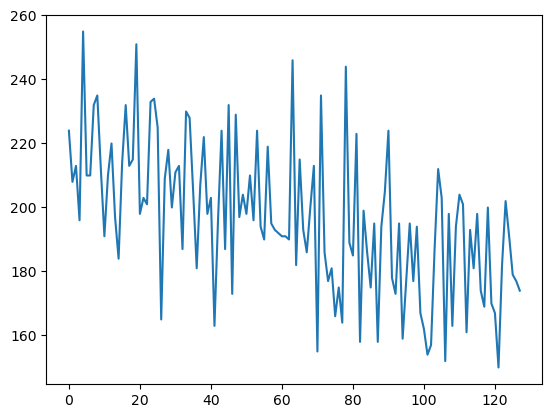

In [19]:
plt.plot(vet2)
print(maximum_frequencies(vet2))

## Transformada de Fourier

Fonte: https://github.com/KellyWiggers/ProcessamentoDeImagens/blob/main/AULA10_FiltragemFrequencia/Fourier.ipynb

In [21]:
img1 = cv2.imread('marte.jpg', 0)
img2 = cv2.imread('gradient_noise.png', 0)
img3 = cv2.imread('board.jpg', 0)

In [30]:
# implementação da versão 2d da transformada discreta de Fourier
def DFT2D(f):
    # Geração de um arranjo vazio de coeficientes complexos
    F = np.zeros(f.shape, dtype = np.complex64)
    n, m = f.shape[0:2]
    
    # geração de índices para multiplicação utilizando numpy (f * exp)
    x = np.arange(n)
    
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                F[u, v] += np.sum(f[:, y] * np.exp( (-1j * 2 * np.pi) * (((u * x) / n) + ((v * y) /m))))
    
    return F / np.sqrt(n * m)

In [31]:
# implementação da versão 2d da transformada inversa de Fourier
def IDFT2D(F):
    # Geração de um arranjo vazio de coeficientes complexos
    f = np.zeros(F.shape, dtype = np.int32)
    n,m = F.shape[0:2]
    
    # geração de índices para multiplicação utilizando numpy
    u = np.arange(n)
    
    
    for x in np.arange(n):
        for y in np.arange(m):
            for v in np.arange(m):
                f[x, y] += np.real(np.sum(F[:, v] * np.exp((1j * 2 * np.pi) * (((u * x) / n) + ((v * y) / m)))))
    
    return np.real(f / np.sqrt(n * m))

In [32]:
# Obtenção de sub-imagens de 64 x 64=4096 pixels
sizes = 64
img1_s = img1
img2_s = img2[0 : sizes, 0 : sizes]
img3_s = img3[5 : sizes + 5, 5 : sizes + 5]

F1s = DFT2D(img1_s)
F2s = DFT2D(img2_s)
F3s = DFT2D(img3_s)

(-0.5, 63.5, 63.5, -0.5)

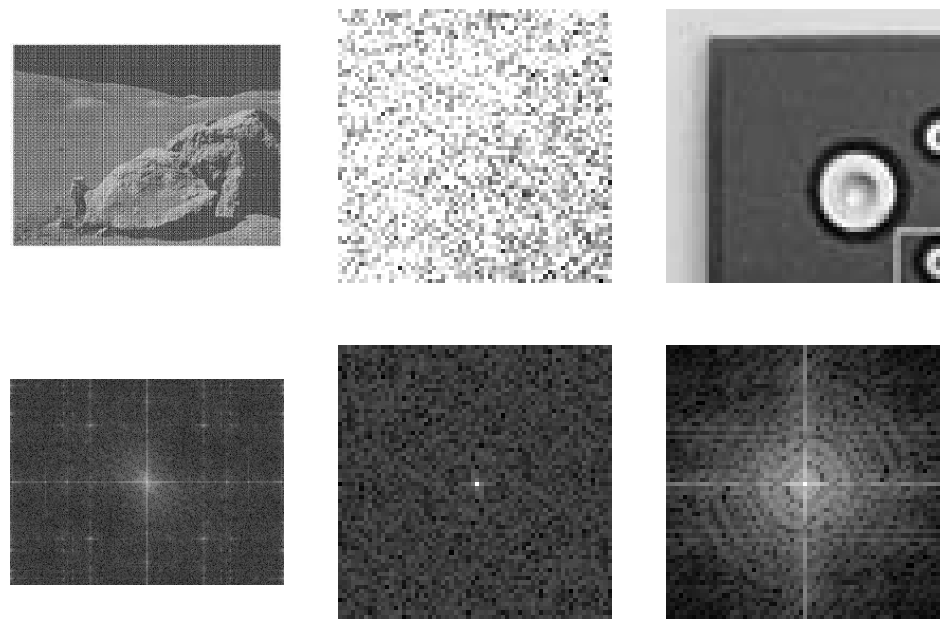

In [33]:
plt.figure(figsize=(12,8)) 
plt.subplot(231)
plt.imshow(img1_s, cmap="gray"); plt.axis('off')
plt.subplot(232)
plt.imshow(img2_s, cmap="gray"); plt.axis('off')
plt.subplot(233)
plt.imshow(img3_s, cmap="gray"); plt.axis('off')

# loga das magnitudes 
plt.subplot(234)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F1s))), cmap="gray")
plt.axis('off')
plt.subplot(235)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F2s))), cmap="gray")
plt.axis('off')
plt.subplot(236)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F3s))), cmap="gray")
plt.axis('off')


### FFTshift(X)

Reorganiza uma transformada de Fourier X deslocando o componente de frequência zero para o centro da matriz.

    Se X for um vetor, então fftshift troca as metades esquerda e direita de X.

    Se X for uma matriz, então fftshift troca o primeiro quadrante de X pelo terceiro e o segundo quadrante pelo quarto.

    Se X for uma matriz multidimensional, então fftshift troca semiespaços de X ao longo de cada dimensão.

Depois:

    Zere o centro de nossa mudança FFT (ou seja, para remover baixas frequências) através de F1p[n2-9:n2+9, m2-9:m2+9] = 0. Esses valores de 9 é o tamanho do raio em torno do ponto central da imagem para o qual zera o deslocamento FFT. Pode modificar.
    Aplique a mudança inversa para colocar o componente DC de volta no canto superior esquerdo (Linha com F1p = np.fft.ifftshift(F1p))
    Aplique o FFT inverso (aplique i1p = IDFT2D(F1p))



In [36]:
n2 = F1s.shape[0] // 2
m2 = F1s.shape[1] // 2

F1p = np.fft.fftshift(F1s).copy()
F1p[n2 - 9 : n2 + 9, m2 - 9 : m2 + 9] = 0 # filtro passa-alta quadrado
F1p = np.fft.ifftshift(F1p)
    
F2p = np.fft.fftshift(F2s).copy()
F2p[: n2 - 9, :] = 0 # filtro passa-baixo quadrado
F2p[:, : m2 - 9] = 0 # filtro passa-baixo quadrado
F2p[n2 + 9 :, :] = 0 # filtro passa-baixo quadrado
F2p[:, m2 + 9 :] = 0 # filtro passa-baixo quadrado
F2p = np.fft.ifftshift(F2p)

F3p = F3s.copy()
F3p[5 : -5, 5 : -5] = 0 # filtro passa-banda
#F3p = np.fft.ifftshift(F3p)

i1p = IDFT2D(F1p)
i2p = IDFT2D(F2p)
i3p = IDFT2D(F3p)

Text(0.5, 1.0, 'original')

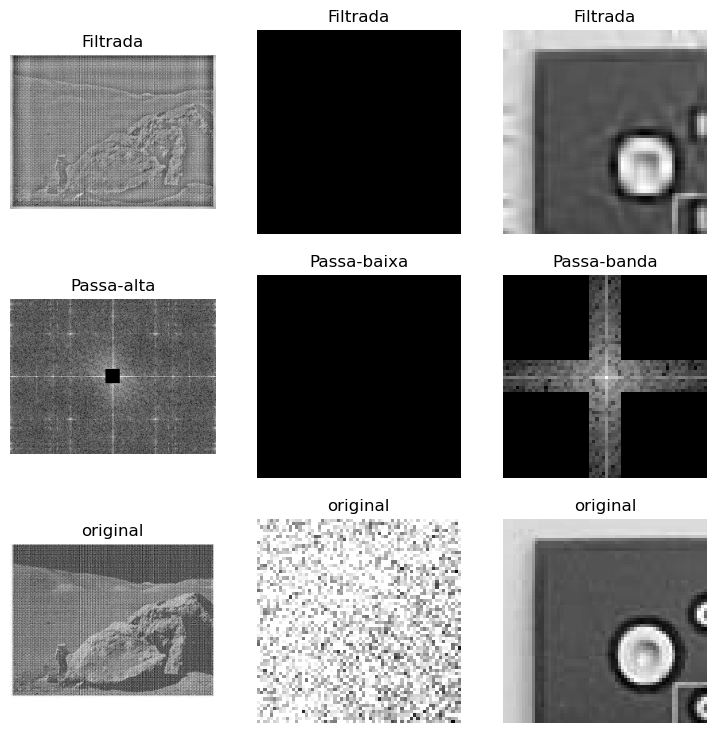

In [37]:
plt.figure(figsize=(9,9)) 
plt.subplot(331)
plt.imshow(i1p, cmap="gray"); plt.axis('off'); plt.title('Filtrada')
plt.subplot(332)
plt.imshow(i2p, cmap="gray"); plt.axis('off'); plt.title('Filtrada')
plt.subplot(333)
plt.imshow(i3p, cmap="gray"); plt.axis('off'); plt.title('Filtrada')

# log das magnitudes 
plt.subplot(334)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F1p))), cmap="gray")
plt.axis('off'); plt.title('Passa-alta')
plt.subplot(335)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F2p))), cmap="gray")
plt.axis('off'); plt.title('Passa-baixa')
plt.subplot(336)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F3p))), cmap="gray")
plt.axis('off'); plt.title('Passa-banda')

plt.subplot(337)
plt.imshow(img1_s, cmap="gray"); plt.axis('off'); plt.title('original')
plt.subplot(338)
plt.imshow(img2_s, cmap="gray"); plt.axis('off'); plt.title('original')
plt.subplot(339)
plt.imshow(img3_s, cmap="gray"); plt.axis('off'); plt.title('original')

#### No OpenCV

In [38]:
F1s = cv2.dft(np.float32(img1_s), flags = cv2.DFT_COMPLEX_OUTPUT)
F2s = cv2.dft(np.float32(img2_s), flags = cv2.DFT_COMPLEX_OUTPUT)
F3s = cv2.dft(np.float32(img3_s), flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift1 = np.fft.fftshift(F1s)
dft_shift2 = np.fft.fftshift(F2s)
dft_shift3 = np.fft.fftshift(F3s)

magnitude_spectrum1 = 20 * np.log(cv2.magnitude(dft_shift1[:, :, 0], dft_shift1[:, :, 1]))
magnitude_spectrum2 = 20 * np.log(cv2.magnitude(dft_shift2[ :, :, 0], dft_shift2[:, :, 1]))
magnitude_spectrum3 = 20 * np.log(cv2.magnitude(dft_shift3[:, :, 0], dft_shift3[:, :, 1]))

Text(0.5, 1.0, 'Filtrada')

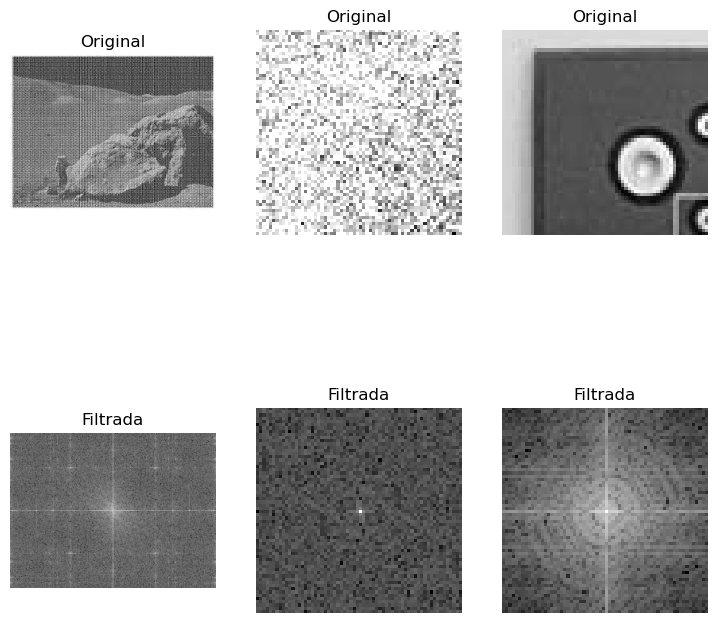

In [39]:
plt.figure(figsize=(9,9)) 
plt.subplot(231)
plt.imshow(img1_s, cmap="gray"); plt.axis('off'); plt.title('Original')
plt.subplot(232)
plt.imshow(img2_s, cmap="gray"); plt.axis('off'); plt.title('Original')
plt.subplot(233)
plt.imshow(img3_s, cmap="gray"); plt.axis('off'); plt.title('Original')
plt.subplot(234)
plt.imshow(magnitude_spectrum1, cmap="gray"); plt.axis('off'); plt.title('Filtrada')
plt.subplot(235)
plt.imshow(magnitude_spectrum2, cmap="gray"); plt.axis('off'); plt.title('Filtrada')
plt.subplot(236)
plt.imshow(magnitude_spectrum3, cmap="gray"); plt.axis('off'); plt.title('Filtrada')

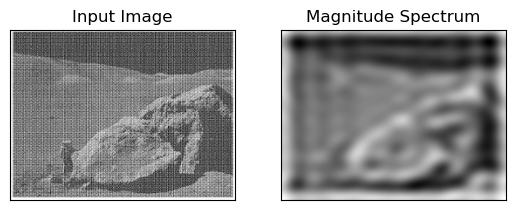

In [41]:
#Aplicando o LFP
F1p = np.fft.fftshift(F1s).copy()
F1p[: n2 - 9, :] = 0
F1p[:, : m2 - 9] = 0
F1p[n2 + 9 :, :] = 0
F1p[:, m2 + 9 :] = 0 
F1p = np.fft.ifftshift(F1p)

img_back = cv2.idft(F1p)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121),plt.imshow(img1_s, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

